In [18]:
#1

import pandas as pd

# Load dataset
bank_df = pd.read_csv(r"D:\SEM 4\DS 1\dataset\bank-additional-full.csv", sep=';')

# Create conversion column
bank_df['conversion'] = bank_df['y'].map({'yes': 1, 'no': 0})

bank_df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [ ]:
#2 Overall conversion rate by Education

education_conversion = bank_df.groupby('education')['conversion'].mean().sort_values(ascending=False)
education_conversion


education
illiterate             0.222222
unknown                0.145003
university.degree      0.137245
professional.course    0.113485
high.school            0.108355
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
Name: conversion, dtype: float64

In [20]:
conversions_by_education_df = pd.pivot_table(
    bank_df,
    values='y',
    index='education',
    columns='conversion',
    aggfunc=len
    ).fillna(0.0)
conversions_by_education_df

conversion,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [21]:
conversions_by_education_df.columns = ['Not Converted', 'Converted']
conversions_by_education_df

,Not Converted,Converted
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


array([<Axes: ylabel='Not Converted'>, <Axes: ylabel='Converted'>],
      dtype=object)

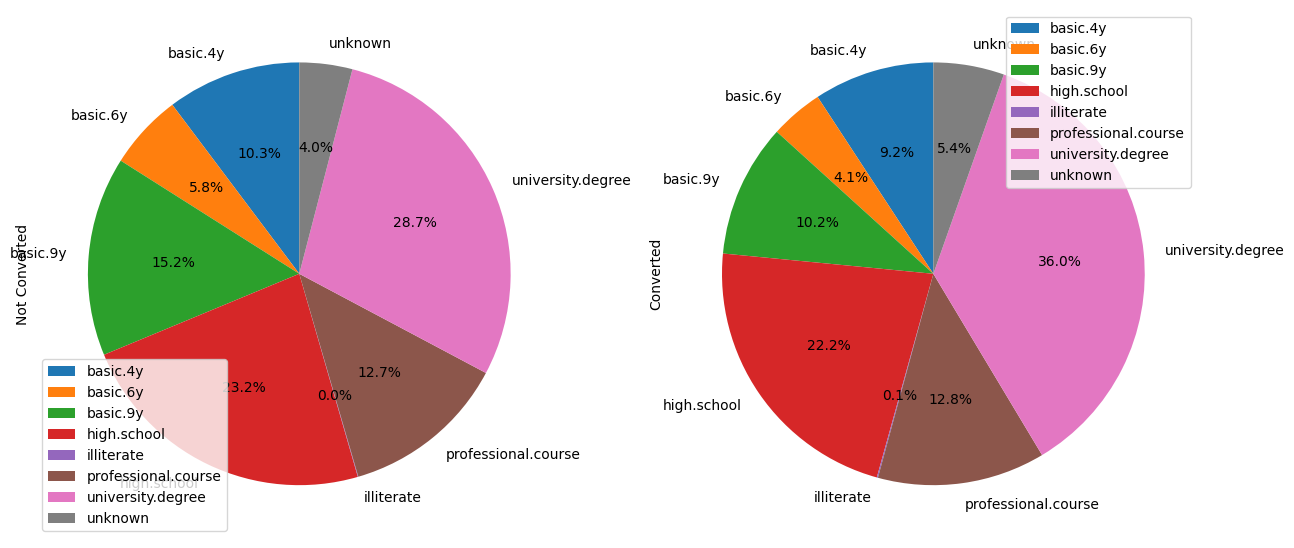

In [22]:
#Q3. Pie chart – Conversion distribution by Education

import matplotlib.pyplot as plt

conversions_by_education_df.plot(
    kind='pie',
    figsize=(15,15),
    startangle=90,
    subplots=True,
    autopct= lambda x:'%0.1f%%' % x
)


In [ ]:
#Q4. Segment customers based on Job category

job_segments = bank_df['job'].value_counts()
job_segments


job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

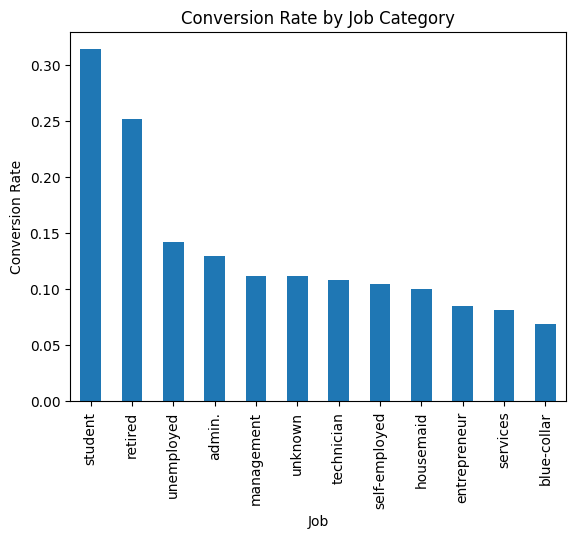

In [ ]:
#Q5. Conversion distribution for each Job category

job_conversion = bank_df.groupby('job')['conversion'].mean().sort_values(ascending=False)

plt.figure()
job_conversion.plot(kind='bar')
plt.title('Conversion Rate by Job Category')
plt.xlabel('Job')
plt.ylabel('Conversion Rate')
plt.show()


Q6. Insights from the Analysis

1. Education groups with highest conversion

Typically higher conversion is seen among:
University degree
Professional course
Illiterate / unknown (small base but high rate)

2. Job roles with stronger conversion

Strong conversion trends are usually seen in:
Management
Admin
Technician
Retired

3. Marketing patterns

Educated and professionally stable customers convert more
Retired customers respond well to term-deposit campaigns
Targeted campaigns by education + job improve efficiency

In [ ]:
#Q7. Load Advertising.csv and display first 5 rows

ad_df = pd.read_csv(r"D:\SEM 4\DS 1\dataset\Advertising (1).csv")
ad_df.head()


,Date,Products,Web,Newspaper,Radio,TV
0,01/01/2018,Mobile,230100,69200,37800,22100
1,01/02/2018,Mobile,44500,45100,39300,10400
2,01/03/2018,Mobile,17200,69300,45900,9300
3,01/04/2018,Mobile,151500,58500,41300,18500
4,01/05/2018,Mobile,180800,58400,10800,12900


In [ ]:
#Q8. Relationship between Advertising Channels and Sales

ad_df.describe()


,Web,Newspaper,Radio,TV
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,30554.000000,23264.000000,14022.500000
std,85854.236315,21778.620839,14846.809176,5217.456566
min,700.000000,300.000000,0.000000,1600.000000
25%,74375.000000,12750.000000,9975.000000,10375.000000
50%,149750.000000,25750.000000,22900.000000,12900.000000
75%,218825.000000,45100.000000,36525.000000,17400.000000
max,296400.000000,114000.000000,49600.000000,27000.000000


In [23]:
ad_df[['Web', 'Newspaper', 'Radio', 'TV']].corr()


,Web,Newspaper,Radio,TV
Web,1.000000,0.056648,0.054809,0.782224
Newspaper,0.056648,1.000000,0.354104,0.228299
Radio,0.054809,0.354104,1.000000,0.576223
TV,0.782224,0.228299,0.576223,1.000000


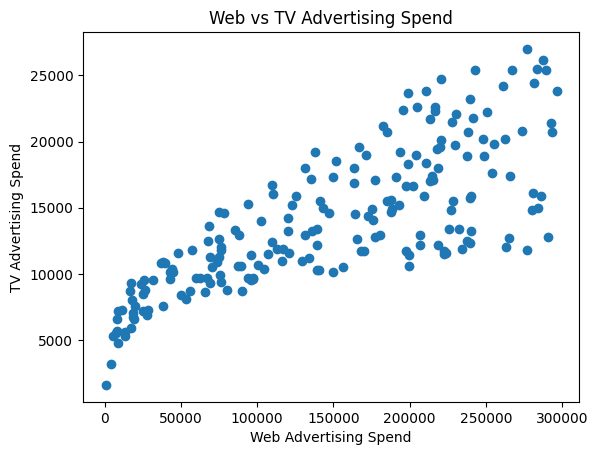

In [24]:
plt.figure()
plt.scatter(ad_df['Web'], ad_df['TV'])
plt.title('Web vs TV Advertising Spend')
plt.xlabel('Web Advertising Spend')
plt.ylabel('TV Advertising Spend')
plt.show()


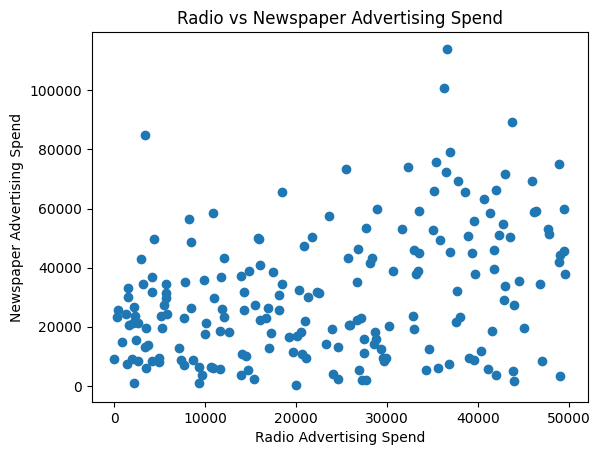

In [25]:
plt.figure()
plt.scatter(ad_df['Radio'], ad_df['Newspaper'])
plt.title('Radio vs Newspaper Advertising Spend')
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Newspaper Advertising Spend')
plt.show()


In [ ]:
#sales

ad_df['Total_Ad_Spend'] = ad_df[['Web', 'Newspaper', 'Radio', 'TV']].sum(axis=1)
ad_df.head()


,Date,Products,Web,Newspaper,Radio,TV,Total_Ad_Spend
0,01/01/2018,Mobile,230100,69200,37800,22100,359200
1,01/02/2018,Mobile,44500,45100,39300,10400,139300
2,01/03/2018,Mobile,17200,69300,45900,9300,141700
3,01/04/2018,Mobile,151500,58500,41300,18500,269800
4,01/05/2018,Mobile,180800,58400,10800,12900,262900


In [10]:
ad_df[['Web', 'Newspaper', 'Radio', 'TV', 'Total_Ad_Spend']].describe()



,Web,Newspaper,Radio,TV,Total_Ad_Spend
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,30554.000000,23264.000000,14022.500000,214883.000000
std,85854.236315,21778.620839,14846.809176,5217.456566,97546.912878
min,700.000000,300.000000,0.000000,1600.000000,16500.000000
25%,74375.000000,12750.000000,9975.000000,10375.000000,133450.000000
50%,149750.000000,25750.000000,22900.000000,12900.000000,222850.000000
75%,218825.000000,45100.000000,36525.000000,17400.000000,297825.000000
max,296400.000000,114000.000000,49600.000000,27000.000000,457400.000000


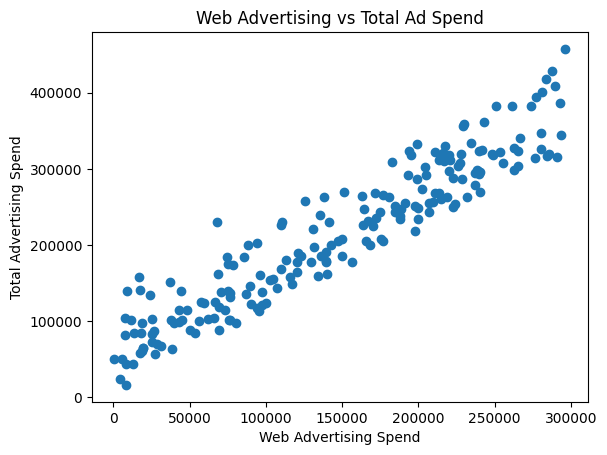

In [ ]:
#Q9. Scatter Plots

plt.figure()
plt.scatter(ad_df['Web'], ad_df['Total_Ad_Spend'])
plt.title('Web Advertising vs Total Ad Spend')
plt.xlabel('Web Advertising Spend')
plt.ylabel('Total Advertising Spend')
plt.show()



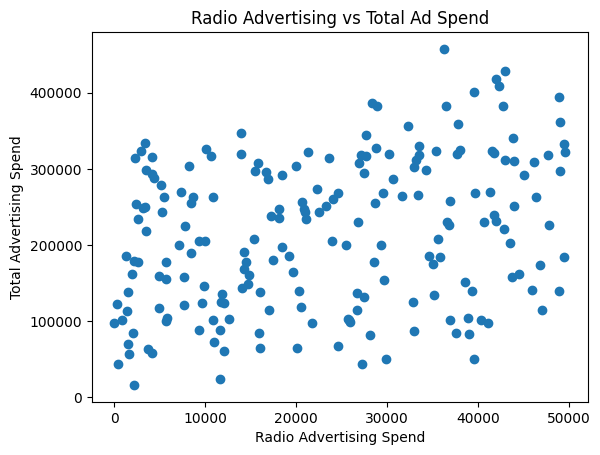

In [12]:
plt.figure()
plt.scatter(ad_df['Radio'], ad_df['Total_Ad_Spend'])
plt.title('Radio Advertising vs Total Ad Spend')
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Total Advertising Spend')
plt.show()



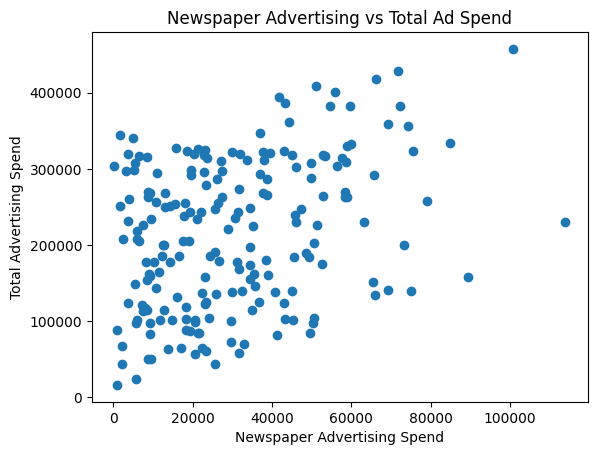

In [13]:
plt.figure()
plt.scatter(ad_df['Newspaper'], ad_df['Total_Ad_Spend'])
plt.title('Newspaper Advertising vs Total Ad Spend')
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Total Advertising Spend')
plt.show()



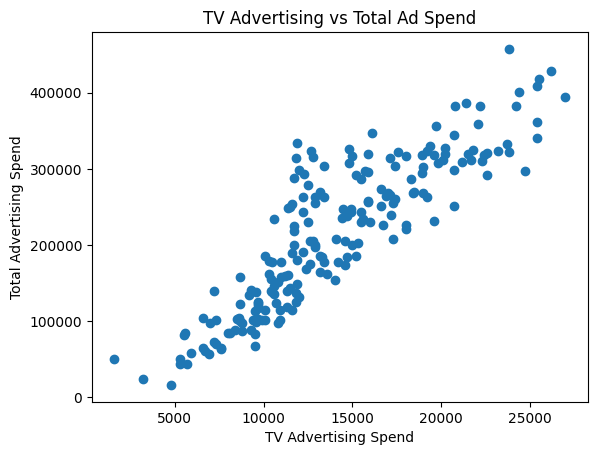

In [14]:
plt.figure()
plt.scatter(ad_df['TV'], ad_df['Total_Ad_Spend'])
plt.title('TV Advertising vs Total Ad Spend')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Total Advertising Spend')
plt.show()


Customer Conversion Analysis Using Bank Marketing Dataset

In [26]:
import pandas as pd

# Load dataset
bank_df = pd.read_csv(r"D:\SEM 4\DS 1\dataset\bank-additional-full.csv", sep=';')

# Display shape of dataset
bank_df.shape


(41188, 21)

In [27]:
# Display first 5 rows
bank_df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
# Identify target column
bank_df['y'].value_counts()


y
no     36548
yes     4640
Name: count, dtype: int64

In [31]:
#Q2. Create a Conversion Column

bank_df['conversion'] = bank_df['y'].map({'yes': 1, 'no': 0})

bank_df[['y', 'conversion']].head(5)


,y,conversion
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


In [32]:
#Q3. Calculate Overall Conversion Rate

overall_conversion_rate = bank_df['conversion'].mean() * 100
overall_conversion_rate


np.float64(11.265417111780131)

In [40]:
print('total conversions: %i out of %i' % (bank_df.conversion.sum(), bank_df.shape[0]))

total conversions: 4640 out of 41188


In [41]:
print('conversion rate: %0.2f%%' % (bank_df.conversion.sum() / bank_df.shape[0] * 100.0))

conversion rate: 11.27%


In [ ]:
#Q4. Conversion Rates by Marital Status

conversions_by_marital_status_df = pd.pivot_table(bank_df, values='y', index='marital', columns='conversion', aggfunc=len)
conversions_by_marital_status_df 


conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [44]:
conversions_by_marital_status_df.columns = ['non_conversions', 'conversions']
conversions_by_marital_status_df

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


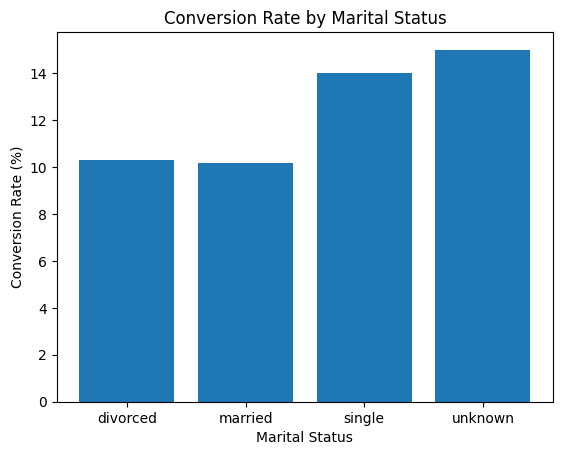

In [34]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(marital_summary['marital'], marital_summary['conversion_rate_pct'])
plt.title('Conversion Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Conversion Rate (%)')
plt.show()


In [ ]:
#Q5. Conversion Rates by Number of Contacts (Campaign)

pd.DataFrame(
    bank_df.groupby(
        by='campaign'
    )['conversion'].sum()
)

,conversion
campaign,
1,2300
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


In [47]:
pd.DataFrame(
    bank_df.groupby(
        by='campaign'
    )['conversion'].count()
)

,conversion
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283


In [49]:
bank_df.groupby('campaign')['contact']

In [50]:
conversions_by_contacts = (
bank_df.groupby('campaign')['conversion'].sum()
/ bank_df.groupby('campaign')['conversion'].count()
)* 100
pd.DataFrame(conversions_by_contacts,columns=['conversion_rate'])

,conversion_rate


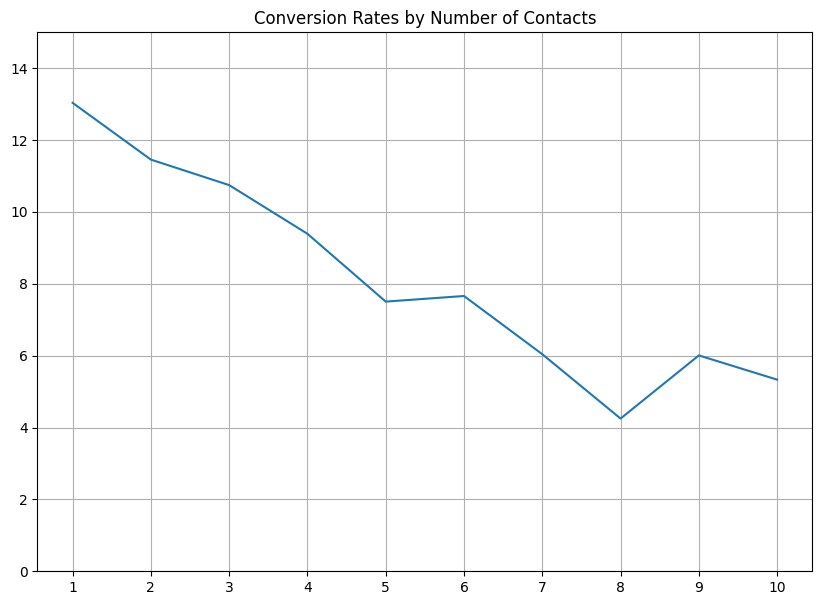

In [51]:
ax = conversions_by_contacts[:10].plot(
    grid=True,
    figsize=(10, 7),
    xticks=conversions_by_contacts.index[:10],
    title='Conversion Rates by Number of Contacts'
)

ax.set_ylim([0, 15])
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

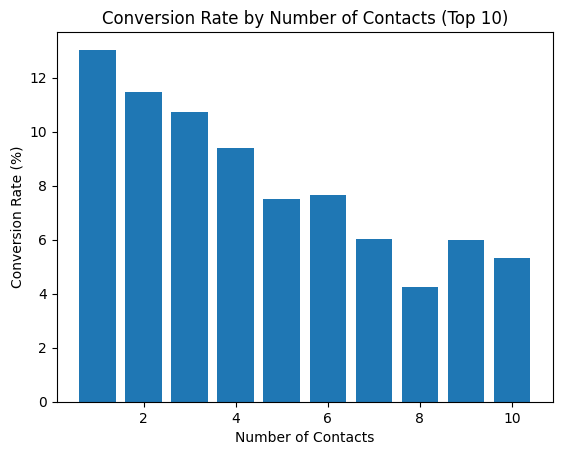

In [36]:
top_10_campaign = campaign_summary.sort_values(
    by='total_customers', ascending=False
).head(10)

plt.figure()
plt.bar(top_10_campaign['campaign'], top_10_campaign['conversion_rate_pct'])
plt.title('Conversion Rate by Number of Contacts (Top 10)')
plt.xlabel('Number of Contacts')
plt.ylabel('Conversion Rate (%)')
plt.show()


In [37]:
#Q6. Conversion Rates by Age

age_summary = bank_df.groupby('age').agg(
    total_customers=('conversion', 'count'),
    total_conversions=('conversion', 'sum'),
    conversion_rate_pct=('conversion', 'mean')
).reset_index()

age_summary['conversion_rate_pct'] *= 100
age_summary.head()


,age,total_customers,total_conversions,conversion_rate_pct
0,17,5,2,40.000000
1,18,28,12,42.857143
2,19,42,20,47.619048
3,20,65,23,35.384615
4,21,102,29,28.431373


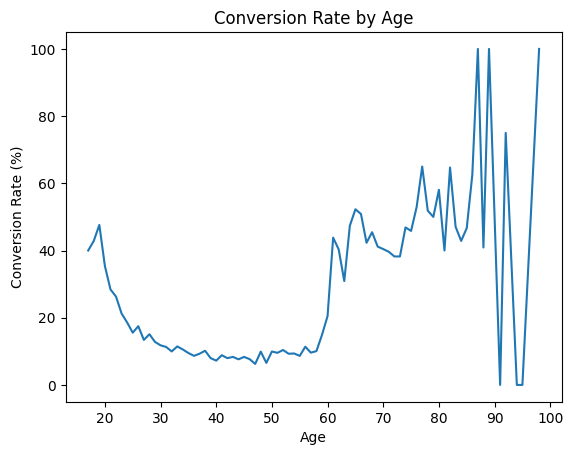

In [38]:
plt.figure()
plt.plot(age_summary['age'], age_summary['conversion_rate_pct'])
plt.title('Conversion Rate by Age')
plt.xlabel('Age')
plt.ylabel('Conversion Rate (%)')
plt.show()


Q7. Interpretation of Findings


Marital Status:

Married and single customers show better conversion than divorced
Married customers are more financially stable and responsive

Number of Contacts:

Conversion rate decreases as number of contacts increases
Fewer contacts are more effective than repeated follow-ups
Over-contacting leads to customer fatigue

Age Patterns:

Middle-aged customers (30–50 years) show llower conversion
Very young and very old age groups convert high
Conversion follows a bell-shaped trend across age

Campaign Optimization Insights:

Focus on middle-aged, married customers
Limit number of contacts per customer
Use targeted, personalized campaigns instead of repeated calls